### Player Position Prediction 

**Hypothesis** - It is generally assumed that the people playing a particular position will have great skills in that particular position and they have necessary skills to play in that position. But how is the position for a player is determined? we can always say that a player is good at a position by looking at the stats in that position compared to how he performed in any other position. But, this is done at face value. A player can upskill and play at any other position which is the underlying truth. We want to challenge the necessarily held belief that a player should play in a particular position based on the stats in that position and post a suggestion that the player can play at other position based on his skills and a little training in a particular skill can have the player taking multiple roles in the team.

**H0** - Player should play a particular position because the player has high ratings in that particualar position.

**H1** - Player's skills should determine the position and posibility of playing in other positions

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('preproc.csv')
df

,ID,Name,Nationality,Club,Age,Height,Weight,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,precise_position,Defense,Forward,Goalkeeper,Midfield
0,158023,L. Messi,Argentina,FC Barcelona,31,5.583333,159.0,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,RF,0,1,0,0
1,20801,Cristiano Ronaldo,Portugal,Juventus,33,6.166667,183.0,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST,0,1,0,0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,26,5.750000,150.0,92,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,LW,0,1,0,0
3,193080,De Gea,Spain,Manchester United,27,6.333333,168.0,91,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK,0,0,1,0
4,192985,K. De Bruyne,Belgium,Manchester City,27,5.916667,154.0,91,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,RCM,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,238813,J. Lundstram,England,Crewe Alexandra,19,5.750000,134.0,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,CM,0,0,0,1
17914,243165,N. Christoffersson,Sweden,Trelleborgs FF,19,6.250000,170.0,47,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,ST,0,1,0,0
17915,241638,B. Worman,England,Cambridge United,16,5.666667,148.0,47,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,ST,0,1,0,0
17916,246268,D. Walker-Rice,England,Tranmere Rovers,17,5.833333,154.0,47,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,RW,0,1,0,0


In [3]:
extras = ['ID', 'Name',  'Nationality', 'Club']

y = [ 'Defense', 'Forward', 'Goalkeeper', 'Midfield', ]

skills = [ 'Crossing', 'Finishing', 'HeadingAccuracy', 
       'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

xs = ['Age', 'Height', 'Weight' ] + skills

In [4]:
X = df[xs].astype('float32')
X

,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31.0,5.583333,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33.0,6.166667,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26.0,5.750000,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27.0,6.333333,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27.0,5.916667,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,19.0,5.750000,134.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
17914,19.0,6.250000,170.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
17915,16.0,5.666667,148.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
17916,17.0,5.833333,154.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [5]:
X = X.drop(columns=['Reactions'])
X.shape

(17918, 36)

In [6]:
y = df[y].apply(lambda ser: ser[ser == 1].index[0], axis=1)
y

0           Forward
1           Forward
2           Forward
3        Goalkeeper
4          Midfield
            ...    
17913      Midfield
17914       Forward
17915       Forward
17916       Forward
17917      Midfield
Length: 17918, dtype: object

**Splitting the data into training, validation and test set**

We randomly split the dataset into train, validation, and test set in a 80-10-10 split.

In [7]:
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.2, random_state=5000)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14334, 36), (3584, 36), (14334,), (3584,))

In [8]:
X_test, X_val, y_test, y_val =  train_test_split(X_val, y_val, test_size=0.5, random_state=5000)
X_test.shape, X_val.shape, y_test.shape, y_val.shape

((1792, 36), (1792, 36), (1792,), (1792,))

In [9]:
def grid_search(X, y, param_grid=None, model_cls=DecisionTreeClassifier):
    param_grid = {'max_depth':range(4, 28, 2), 'max_features':[0.5, 0.6, 0.7,0.8,0.9,1.0]} if param_grid is None else param_grid
    gs = GridSearchCV(model_cls(random_state=1234), param_grid=param_grid, n_jobs=-1)
    gs.fit(X, y)
    return gs.best_estimator_, gs.best_params_, gs.best_score_

def plot_confusion_matrix(model, X_val, y_val):
    cols = sorted(list(np.unique(y_val)))
    data = pd.DataFrame(confusion_matrix(y_val, model.predict(X_val)), index=cols, columns=cols)
    sns.heatmap(data, annot=True, fmt='d')
    
def eval_classification_model(model, X_val, y_val, ds_name='validation'):
    print(f'All of the below metrics are on the {ds_name} set - \n')
    acc = model.score(X_val, y_val)
    print(f'Accuracy : {acc}\n')
    print('Classification report : \n')
    print(classification_report(y_val, model.predict(X_val)))
    print('\nConfusion Matrix : \n')
    plot_confusion_matrix(model, X_val, y_val)
    return acc, classification_report(y_val, model.predict(X_val), output_dict=True)['macro avg']['f1-score']

In [10]:
all_res = []

{'max_depth': 10, 'max_features': 0.9}
All of the below metrics are on the validation set - 

Accuracy : 0.8493303571428571

Classification report : 

              precision    recall  f1-score   support

     Defense       0.88      0.91      0.89       577
     Forward       0.82      0.76      0.79       355
  Goalkeeper       1.00      1.00      1.00       207
    Midfield       0.79      0.80      0.80       653

    accuracy                           0.85      1792
   macro avg       0.87      0.87      0.87      1792
weighted avg       0.85      0.85      0.85      1792


Confusion Matrix : 



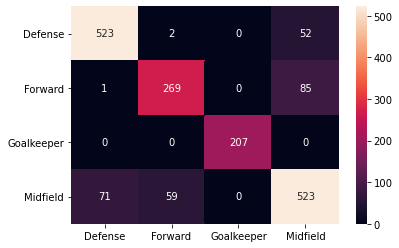

In [11]:
param_grid = {'max_depth': [5, 10, 15, 20, 25, 30, None], 'max_features':['auto', 0.7, 0.8, 0.9]}
model, params, score = grid_search(X_train, y_train, param_grid=param_grid, model_cls=DecisionTreeClassifier)
print(params)
acc, f1 = eval_classification_model(model, X_val, y_val)
all_res.append(('Decision Tree', score, f1))

{'C': 10.0, 'kernel': 'rbf'}
All of the below metrics are on the validation set - 

Accuracy : 0.9040178571428571

Classification report : 

              precision    recall  f1-score   support

     Defense       0.94      0.95      0.95       577
     Forward       0.90      0.77      0.83       355
  Goalkeeper       1.00      1.00      1.00       207
    Midfield       0.85      0.91      0.87       653

    accuracy                           0.90      1792
   macro avg       0.92      0.91      0.91      1792
weighted avg       0.91      0.90      0.90      1792


Confusion Matrix : 



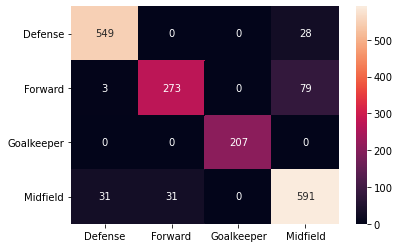

In [12]:
param_grid = {'kernel':['linear','rbf'], 'C': [0.01, 0.1, 1. , 10.,]}
model, params, score = grid_search(X, y, param_grid=param_grid, model_cls=SVC)
print(params)
acc, f1 = eval_classification_model(model, X_val, y_val)
all_res.append(('Support Vector Machine', score, f1))

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}
All of the below metrics are on the validation set - 

Accuracy : 0.8889508928571429

Classification report : 

              precision    recall  f1-score   support

     Defense       0.92      0.95      0.94       577
     Forward       0.85      0.79      0.82       355
  Goalkeeper       1.00      1.00      1.00       207
    Midfield       0.84      0.85      0.85       653

    accuracy                           0.89      1792
   macro avg       0.90      0.90      0.90      1792
weighted avg       0.89      0.89      0.89      1792


Confusion Matrix : 



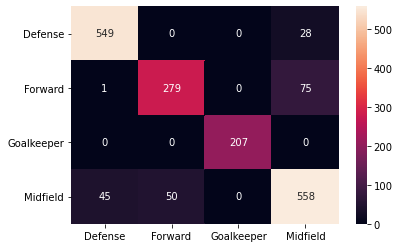

In [13]:
param_grid = {'n_estimators':[10, 100, 200], 'max_depth': [10, 20, 30, None], 'max_features':['auto', 0.7, 0.8, 0.9]}
model, params, score = grid_search(X_train, y_train, param_grid=param_grid, model_cls=RandomForestClassifier)
print(params)
acc, f1 = eval_classification_model(model, X_val, y_val)
all_res.append(('Random Forest', score, f1))

C:\Users\geeth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 0.1}
All of the below metrics are on the validation set - 

Accuracy : 0.8856026785714286

Classification report : 

              precision    recall  f1-score   support

     Defense       0.92      0.93      0.93       577
     Forward       0.83      0.82      0.82       355
  Goalkeeper       1.00      1.00      1.00       207
    Midfield       0.85      0.84      0.84       653

    accuracy                           0.89      1792
   macro avg       0.90      0.90      0.90      1792
weighted avg       0.89      0.89      0.89      1792


Confusion Matrix : 



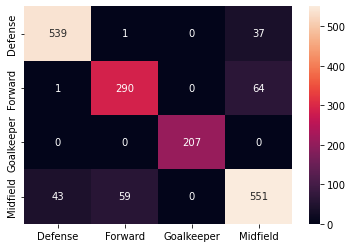

In [11]:
param_grid = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}
model, params, score = grid_search(X_train, y_train, param_grid=param_grid, model_cls=LogisticRegression)
print(params)
acc, f1 = eval_classification_model(model, X_val, y_val)
all_res.append(('Logistic Regression', score, f1))

All of the below metrics are on the validation set - 

Accuracy : 0.8895089285714286

Classification report : 

              precision    recall  f1-score   support

     Defense       0.93      0.94      0.93       577
     Forward       0.87      0.77      0.82       355
  Goalkeeper       1.00      1.00      1.00       207
    Midfield       0.83      0.88      0.85       653

    accuracy                           0.89      1792
   macro avg       0.91      0.90      0.90      1792
weighted avg       0.89      0.89      0.89      1792


Confusion Matrix : 



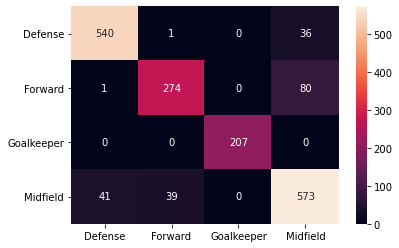

In [15]:
model = MLPClassifier(random_state=1, max_iter=50000, tol = 1e-3, learning_rate = 'adaptive', solver = 'sgd', 
                       activation = 'tanh')
model.fit(X_train, y_train)
acc, f1 = eval_classification_model(model, X_val, y_val)
all_res.append(('MLPClassifier', score, f1))

In [16]:
res = pd.DataFrame(all_res, columns=['Model', 'Accuracy', 'F1']
                  ).sort_values(by=['F1', 'Accuracy'], ascending=False).reset_index(drop=True)
res

,Model,Accuracy,F1
0,Support Vector Machine,0.881460,0.912497
1,MLPClassifier,0.880634,0.901230
2,Random Forest,0.881819,0.900491
3,Logistic Regression,0.880634,0.898111
4,Decision Tree,0.836892,0.868635


##### The highest f1 score is in the Support Vector Machine with 0.9125 and 
##### From the confusion matrix we can understand that the model finds it difficult to classify the forward position and labels it as Midfield.
##### The model perfectly classifies the goalkeeper position everytime

### Test set score

We retrain the best model using the best hyperparameters on both the training and validation set and perform the evaluation on the test set to get the final model evaluation.

In [17]:
X, y = pd.concat((X_train, X_val), axis=0), pd.concat((y_train, y_val), axis=0)
X.shape, y.shape

((16126, 36), (16126,))

All of the below metrics are on the test set - 

Accuracy : 0.8794642857142857

Classification report : 

              precision    recall  f1-score   support

     Defense       0.92      0.93      0.92       589
     Forward       0.86      0.70      0.77       309
  Goalkeeper       1.00      1.00      1.00       207
    Midfield       0.82      0.88      0.85       687

    accuracy                           0.88      1792
   macro avg       0.90      0.88      0.89      1792
weighted avg       0.88      0.88      0.88      1792


Confusion Matrix : 



(0.8794642857142857, 0.8861217006198151)

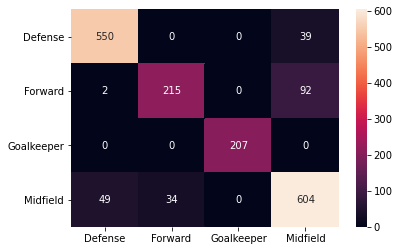

In [20]:
model = SVC(C=10.0, kernel='rbf') # using the best hyperparameters
model.fit(X, y)
acc, f1 = eval_classification_model(model, X_test, y_test, ds_name='test')
acc, f1

The test set **f1 score** is **0.8861**. The test set **accuracy** is **87.95%**.

#### Conclusion 
It is quite obvious to say that the position of the Goal Keeper is never changing and he is specifically trained for that position and needs to be highly trained to be played in other areas which he can be quite effectively utilized.

Classifying the defense class seems to be a less difficult task compared to other positions except goal keeper for any machine learning model.

Decision Tree classifier performs poorly while the ensemble learning method of Decision Tree, Random Forest classifier performs really well among the two. Random forest comes close second to the MLP classifier.

It is safe to say that our model failed to reject the null hypothesis in its current state.